Привет! Ты теперь находишься на территории код-ревьюеров. У нас тут своя атмосфера и правила:  
1. Меня зовут Алексей Свирин.  
2. Общаемся на ты.  
3. Хочешь мне написать — пиши. Только нужно выбрать свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку, но все остальное как в жизни, может быть сложно.  
5. У тебя бесконечное количество ~~жизней~~ попыток для сдачи проекта.  
6. Поехали!  

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера №1

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-info">
    

### Комментарий от ревьюера #1

У тебя получилась одна из лучших работ в текущей когорте, из тех, которые я проверял. Все задания сделаны верно. Очень круто и правильно проведен А/Б-тест, совершенно верно найдены все метрики по воронке и проанализирован наш датасет. Все выводы полные и корректные, гипотезы к тесту есть. Так что ты большая молодец. Проект принят. Поздравляю с окончанием второго модуля!
</div>

**АНАЛИЗ ПОВЕДЕНИЯ ПОЛЬЗОВАТЕЛЕЙ МОБИЛЬНОГО ПРИЛОЖЕНИЯ МАГАЗИНА ПРОДУКТОВ ПИТАНИЯ**

**Описание проекта**


Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.


Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?


После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие.

* EventName — название события;
* DeviceIDHash — уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Оглавление:**


[Шаг 1. Загрузка данных и поготовка их к анализу](#step_1)


[Шаг 2. Провека данных](#step_2)


[Шаг 3. Анализ воронки событий](#step_3)


[Шаг 4. Анализ эксперемента](#step_4)


[Шаг 4. Выводы](#step_5)

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Хорошее начало проекта.
</div>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np
import math as mth

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

<a id='step_1'></a>
**Шаг №1. Загрузим данные и подготовим их к анализу**

In [3]:
data = pd.read_csv('/datasets/logs_exp.csv', delimiter = "\t")

In [4]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [5]:
# заменим названия столбцов на удобные
data = data.rename(columns = {'EventName':'event', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_time', 'ExpId':'group'})

In [6]:
data.head()

,event,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [7]:
#проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event         244126 non-null object
user_id       244126 non-null int64
event_time    244126 non-null int64
group         244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [8]:
#проверим дубликаты
mask = data.duplicated()
#data.query('user_id == 434103746454591587 and event_time == 1564628377')
print("Всего {} дубликатов".format(data[mask].shape[0]))

Всего 413 дубликатов


In [9]:
data.query('user_id == 434103746454591587 and event_time == 1564628377')

,event,user_id,event_time,group
3572,MainScreenAppear,434103746454591587,1564628377,248
3573,MainScreenAppear,434103746454591587,1564628377,248


In [10]:
# удалим повторения
data = data.drop_duplicates().reset_index(drop=True)

In [11]:
#добавит столбец даты и времени
data['date_time'] = pd.to_datetime(data['event_time'], unit = 's')
data['date'] = data['date_time'].dt.date
data['time'] = data['date_time'].dt.time

In [12]:
data.head()

,event,user_id,event_time,group,date_time,date,time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,11:48:42


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 7 columns):
event         243713 non-null object
user_id       243713 non-null int64
event_time    243713 non-null int64
group         243713 non-null int64
date_time     243713 non-null datetime64[ns]
date          243713 non-null object
time          243713 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 13.0+ MB


**ВЫВОД:**
* изначально в данных 244126 строк, из которых 413 повторения. Возможно, это случаи, когда сессия не совершилась и пользователь повторно делал туже операцию. дубликаты из данных удалили.
* пропусков нет 
* заменили названия стоблцов на удобные
* перевели дату в формате utc в datetime и добавили столбы с датой и временем

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Первый раздел сделан хорошо.
</div>

<a id='step_2'></a>
**Шаг №2. Изучим и проверим данные**

In [14]:
# посмотрим на виды событий и их количетсво
data.groupby('event')['event'].count().sort_values(ascending = False)

event
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

In [15]:
# посмотрим сколько всего событий, пользователей и сколько в среднем событий приходится на одного пользователя
print('Всего {} событий'.format(data.shape[0]))
print('Всего {} уникальных пользователей'.format(len(data['user_id'].unique())))
print('В среднем на пользователя приходится {:.0f} события'.format(data.shape[0]/len(data['user_id'].unique())))

Всего 243713 событий
Всего 7551 уникальных пользователей
В среднем на пользователя приходится 32 события


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

В этом моменте можно было еще посмотреть на медиану и моду. И сделать вывод о распределении наших данных.

</div>

In [16]:
print('Данные по заказам за период {:%d-%m-%Y} - {:%d-%m-%Y}'.format(data['date_time'].min(), data['date_time'].max()))

Данные по заказам за период 25-07-2019 - 07-08-2019


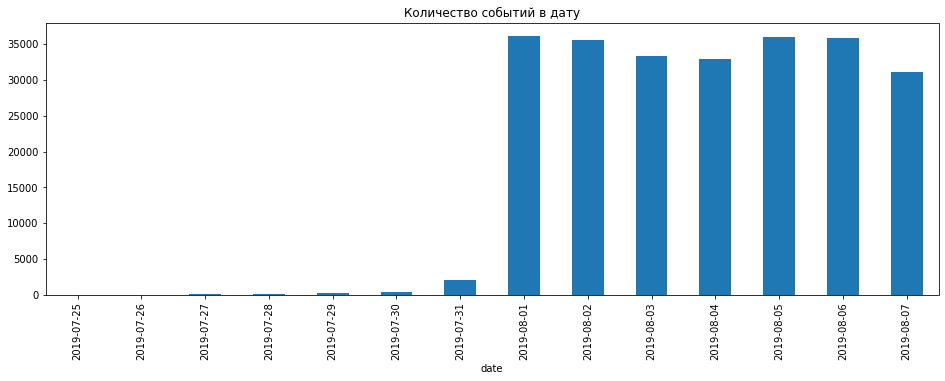

In [17]:
plt.title('Количество событий в дату')
data.groupby('date')['date'].count().plot(kind = 'bar', figsize = (16, 5));

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

Не забывай об оформлении графиков.

</div>

In [18]:
#посмотрим, сколько произошло событий до 1 августа и сколько пользователей совершало эти действия 
print('Всего {} событий или {:.2%} cовершено до 1 августа'.format(data.query('date_time < "2019-08-01"')['event'].count(), data.query('date_time < "2019-08-01"')['event'].count()/data.shape[0]))

Всего 2826 событий или 1.16% cовершено до 1 августа


In [19]:
users_lack = data.query('date_time < "2019-08-01"')['user_id'].unique()
print("Всего {} уникальных пользователей, которые совершали действия до 1 августа".format(len(users_lack)))

Всего 1451 уникальных пользователей, которые совершали действия до 1 августа


In [20]:
#посмострим, совершали ли эти пользователи действия 1 августа и далее 
users_actual = data.query('date_time >= "2019-08-01"')['user_id'].unique()
print("Всего {} из {} пользователей cовершали действия 1 августа и далее".format(len(pd.Series(np.intersect1d(users_lack, users_actual))), len(users_lack)))

Всего 1434 из 1451 пользователей cовершали действия 1 августа и далее


In [21]:
data['group'].unique()

array([246, 248, 247])

In [22]:
users_246 = data.loc[data['group'] == 246]['user_id'].unique()
users_247 = data.loc[data['group'] == 247]['user_id'].unique()
users_248 = data.loc[data['group'] == 248]['user_id'].unique()

In [23]:
users_246_actual = data.query('date_time >= "2019-08-01"').loc[data['group'] == 246]['user_id'].unique()
users_247_actual = data.query('date_time >= "2019-08-01"').loc[data['group'] == 247]['user_id'].unique()
users_248_actual = data.query('date_time >= "2019-08-01"').loc[data['group'] == 248]['user_id'].unique()

In [24]:
print("Количетсво пользователей для группы 246 уменьшилось на {}".format(len(users_246) - len(pd.Series(np.intersect1d(users_246, users_246_actual)))))
print("Количетсво пользователей для группы 247 уменьшилось на {}".format(len(users_247) - len(pd.Series(np.intersect1d(users_247, users_247_actual)))))
print("Количетсво пользователей для группы 248 уменьшилось на {}".format(len(users_248) - len(pd.Series(np.intersect1d(users_248, users_248_actual)))))

Количетсво пользователей для группы 246 уменьшилось на 5
Количетсво пользователей для группы 247 уменьшилось на 7
Количетсво пользователей для группы 248 уменьшилось на 5


In [25]:
# не будем учитывать данные до 1 августа при анализе
data_actual = data.query('date_time >= "2019-08-01"')

**ВЫВОД:**
* в данных всего 243713 событий, 7551 уникальных пользователей и в среднем на пользователя приходится 32 события
* события совершены в период 25-07-2019 - 07-08-2019, при этом в период до 1 августа было совершено 2826 событий или 1.16% 
* при отбрасывании данных до 1 агвуста мы потеряем 17 пользователей, по 5 из 246 и 248 групп и 7 из 247
* 5 видов событий: главный экран, экран с предложениями, корзина, страница оплаты и руководство. Для страницы руководство характерно наименьшее количество просмотров. 
* не будем использовать данные до 1 августа при анализе

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Все, кроме графика, сделано верно)

</div>

<a id='step_3'></a>
**Шаг №3. Изучим воронку событий**

In [26]:
# посмотрим еще раз на виды событий и их количетсво
data_actual.groupby('event')['event'].count().sort_values(ascending = False)

event
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

In [27]:
# посмотрим для каждого события количество уникальных пользователей и посчитаем их долю
data_events = data_actual.groupby('event').agg({'user_id' : 'nunique'}).reset_index().rename(columns = {"user_id":'unique_users'})
data_events['conv'] = 100 *data_events['unique_users']/len(data_actual['user_id'].unique())
data_events = data_events.sort_values(by='unique_users', ascending = False)
data_events

,event,unique_users,conv
1,MainScreenAppear,7419,98.473586
2,OffersScreenAppear,4593,60.963632
0,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера #1

Можешь предположить почему на главную приходит только 98,5% пользователей? Этот экран вроде нельзя пропустить в приложении.
</div>

In [28]:
#событие Tutorial\Руководство явно выбивается из воронки. Не будем учитывать его в воронке. 
data_events = data_events.drop(data_events.loc[data_events['event'] == 'Tutorial'].index).reset_index(drop = True)
data_events

,event,unique_users,conv
0,MainScreenAppear,7419,98.473586
1,OffersScreenAppear,4593,60.963632
2,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера #1

Воронка определена верно.
</div>

In [29]:
#посчитаем % пользователей, которые перешли на следующий шаг. 
data_events.loc[0, 'conv_next_step'] = 100
for x in range(1, data_events.shape[0]):
    data_events.loc[x, 'conv_next_step'] = 100 * data_events.loc[x, 'unique_users'] / data_events.loc[x-1, 'unique_users']

In [30]:
data_events

,event,unique_users,conv,conv_next_step
0,MainScreenAppear,7419,98.473586,100.000000
1,OffersScreenAppear,4593,60.963632,61.908613
2,CartScreenAppear,3734,49.561986,81.297627
3,PaymentScreenSuccessful,3539,46.973719,94.777718


**ВЫВОД:**
* всего 5 видов событий, при это собитые Tutorial явно вибивается из воронки. Обычно так называют страницы с руководством пользователя, поэтому не будем учитывать данное событие при анализе.
* судя по кол-ву пользователей, события происходят в следующем порядке: страница главного экрана, страница с предложениями, страница корзины и страница успешной оплаты. 
* 47% уникальных пользователей доходят до оплаты, при это наибольшее количество пользователей отпадает на втором шаге: 62% пользователей, которые заходили на главную страницу, заходят на страницу с предложениями. Тем не менее % перехода на следующие шаги достаточно высокий: 81% на страницу корзины и 94,7% на страницу успешной оплаты.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера #1

Все метрики найдены отлично.
</div>

<a id='step_4'></a>
**Шаг №4. Изучим результаты эксперемента**

In [31]:
#посмотрим, сколько пользователей в каждой группе
print("Количество пользователей в группе 246 - {}, в группе 247 - {}, в группе 248 - {}".format(len(users_246_actual), len(users_247_actual), len(users_248_actual)))

Количество пользователей в группе 246 - 2484, в группе 247 - 2513, в группе 248 - 2537


In [32]:
# получим сводную таблицу с количеством уникальных пользователей по каждому событию в разбивке по группам
data_events_groups = data_actual.pivot_table(index = 'event', columns = 'group', values = 'user_id', aggfunc = 'nunique').reset_index().sort_values(by = 246, ascending = False).reset_index(drop = True)

# добавим количество уникальных пользователей в каждой группе в Total
#data_events_groups.loc[4] = ['Total', len(users_246_actual), len(users_247_actual), len(users_248_actual)]

data_events_groups['246+247'] = data_events_groups[246] + data_events_groups[247]

data_events_groups

group,event,246,247,248,246+247
0,MainScreenAppear,2450,2476,2493,4926
1,OffersScreenAppear,1542,1520,1531,3062
2,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358
4,Tutorial,278,283,279,561


In [33]:
# создадим отдельные таблицы для удобства
data_AA = data_events_groups.loc[:, ['event', 246, 247]].rename(columns = {246: 1, 247 : 2 })
data_AA['total_1'] = len(users_246_actual)
data_AA['total_2'] = len(users_247_actual)

data_AB1 = data_events_groups.loc[:, ['event', 246, 248]].rename(columns = {246: 1, 248 : 2 })
data_AB1['total_1'] = len(users_246_actual)
data_AB1['total_2'] = len(users_248_actual)

data_AB2 = data_events_groups.loc[:, ['event', 247, 248]].rename(columns = {247: 1, 248 : 2 })
data_AB2['total_1'] = len(users_247_actual)
data_AB2['total_2'] = len(users_248_actual)

data_AAB = data_events_groups.loc[:, ['event', '246+247', 248]].rename(columns = {'246+247': 1, 248 : 2 })
data_AAB['total_1'] = len(users_246_actual) + len(users_247_actual)
data_AAB['total_2'] = len(users_248_actual)
data_AA

group,event,1,2,total_1,total_2
0,MainScreenAppear,2450,2476,2484,2513
1,OffersScreenAppear,1542,1520,2484,2513
2,CartScreenAppear,1266,1238,2484,2513
3,PaymentScreenSuccessful,1200,1158,2484,2513
4,Tutorial,278,283,2484,2513


In [34]:
#проверим гипотезу о равенстве конверсии по каждому событию для двух генераньлых совокупностей
#нулевая гипотеза: конверсии (доли) для двух генеральных совокупностей равны
#альтернативная гипотеза: конверии (доли) для двух генеральных совокупностей не равны

def z_test(string):
    p1 = string[1] / string['total_1']
    p2 = string[2]  / string['total_2']
    p_combined = (string[1] + string[2]) / (string['total_1'] + string['total_2'])
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/string['total_1'] + 1/string['total_2']))
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

In [35]:
def z_test_results(string):
    alpha = .05
    if string['p_value'] < alpha: 
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу'    

In [36]:
data_AA['p_value'] = data_AA.apply(z_test, axis = 1)
data_AA['results_0.05'] = data_AA.apply(z_test_results, axis = 1)
data_AA

group,event,1,2,total_1,total_2,p_value,results_0.05
0,MainScreenAppear,2450,2476,2484,2513,0.757060,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,1542,1520,2484,2513,0.248095,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,1266,1238,2484,2513,0.228834,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,1200,1158,2484,2513,0.114567,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,278,283,2484,2513,0.937700,Не получилось отвергнуть нулевую гипотезу


In [37]:
data_AB1['p_value'] = data_AB1.apply(z_test, axis = 1)
data_AB1['results_0.05'] = data_AB1.apply(z_test_results, axis = 1)
data_AB1

group,event,1,2,total_1,total_2,p_value,results_0.05
0,MainScreenAppear,2450,2493,2484,2537,0.294972,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,1542,1531,2484,2537,0.208362,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,1266,1230,2484,2537,0.078429,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,1200,1181,2484,2537,0.212255,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,278,279,2484,2537,0.826429,Не получилось отвергнуть нулевую гипотезу


In [38]:
data_AB2['p_value'] = data_AB2.apply(z_test, axis = 1)
data_AB2['results_0.05'] = data_AB2.apply(z_test_results, axis = 1)
data_AB2

group,event,1,2,total_1,total_2,p_value,results_0.05
0,MainScreenAppear,2476,2493,2513,2537,0.458705,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,1520,1531,2513,2537,0.919782,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,1238,1230,2513,2537,0.578620,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,1158,1181,2513,2537,0.737342,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,283,279,2513,2537,0.765324,Не получилось отвергнуть нулевую гипотезу


In [39]:
data_AAB['p_value'] = data_AAB.apply(z_test, axis = 1)
data_AAB['results_0.05'] = data_AAB.apply(z_test_results, axis = 1)
data_AAB

group,event,1,2,total_1,total_2,p_value,results_0.05
0,MainScreenAppear,4926,2493,4997,2537,0.294245,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,3062,1531,4997,2537,0.434255,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,2504,1230,4997,2537,0.181759,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,2358,1181,4997,2537,0.600429,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,561,279,4997,2537,0.764862,Не получилось отвергнуть нулевую гипотезу


In [40]:
#мы провели 20 z-тестов. применим поправку Бонферрони, 
# корректируем уровень значимости на 0.05/20 = 0.0025 и посмотрим на результаты
def z_test_results_0025(string):
    alpha = .0025
    if string['p_value'] < alpha: 
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу'  

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера #1

Круто, что применила поправку и применила ее правильно.
</div>

In [41]:
data_AA['results_0.0025'] = data_AA.apply(z_test_results_0025, axis = 1)
data_AB1['results_0.0025'] = data_AB1.apply(z_test_results_0025, axis = 1)
data_AB2['results_0.0025'] = data_AB2.apply(z_test_results_0025, axis = 1)
data_AAB['results_0.0025'] = data_AAB.apply(z_test_results_0025, axis = 1)


In [42]:
print('Результаты теста для AA групп')
data_AA

Результаты теста для AA групп


group,event,1,2,total_1,total_2,p_value,results_0.05,results_0.0025
0,MainScreenAppear,2450,2476,2484,2513,0.757060,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,1542,1520,2484,2513,0.248095,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,1266,1238,2484,2513,0.228834,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,1200,1158,2484,2513,0.114567,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,278,283,2484,2513,0.937700,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу


In [43]:
print('Результаты теста для AB1 групп')
data_AB1

Результаты теста для AB1 групп


group,event,1,2,total_1,total_2,p_value,results_0.05,results_0.0025
0,MainScreenAppear,2450,2493,2484,2537,0.294972,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,1542,1531,2484,2537,0.208362,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,1266,1230,2484,2537,0.078429,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,1200,1181,2484,2537,0.212255,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,278,279,2484,2537,0.826429,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу


In [44]:
print('Результаты теста для AB2 групп')
data_AB2

Результаты теста для AB2 групп


group,event,1,2,total_1,total_2,p_value,results_0.05,results_0.0025
0,MainScreenAppear,2476,2493,2513,2537,0.458705,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,1520,1531,2513,2537,0.919782,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,1238,1230,2513,2537,0.578620,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,1158,1181,2513,2537,0.737342,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,283,279,2513,2537,0.765324,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу


In [45]:
print('Результаты теста для AAB групп')
data_AAB

Результаты теста для AAB групп


group,event,1,2,total_1,total_2,p_value,results_0.05,results_0.0025
0,MainScreenAppear,4926,2493,4997,2537,0.294245,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
1,OffersScreenAppear,3062,1531,4997,2537,0.434255,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
2,CartScreenAppear,2504,1230,4997,2537,0.181759,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
3,PaymentScreenSuccessful,2358,1181,4997,2537,0.600429,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу
4,Tutorial,561,279,4997,2537,0.764862,Не получилось отвергнуть нулевую гипотезу,Не получилось отвергнуть нулевую гипотезу


**ВЫВОД**:
* статистически разниц между группами АА, АВ1, АВ2 и ААВ нет при уровне значимости 0.05 (контрольные группы АА: 246 и 247, эксперементальная В: 248)
* при корректировки уровня значимости с поправкой Бонферрони (20 эксперементов) результат не изменился: статистически не наблюдается различий между группами, поэтому нельзя сделать вывод, что шрифты играют роль в поведении пользователей.

<a id='step_5'></a>
**ОБЩИЙ ВЫВОД:**

* данные содержат в себе события, совершенные в период 25-07-2019 - 07-08-2019, при этом до 1 агвуста данные не полные: в этот период было совершенно 2826 событий или 1.16%. данные до 1 августа не использовали при анализе. 
* в данных содержится 5 видов событий: главный экран, экран с предложениями, корзина, страница оплаты и руководство. При этом страница "руководство" явно выбивается из воронки: 11% уникальных пользователей хоть раз заходили на эту страницу (при анализе воронки эту страницу не учитывали).
* при анализе воронки событий можно сделать вывод, что большая часть пользователей теряется на втором этапе: открытие страницы с предложениями. Только 62% процента уникальных пользователей, которые зашли на главную страницу, заходят на страницу с предложениями. Тем не менее коверсия в следующие шаги, корзина и успешная оплата, высокая: 81,3% пользователей, которые заходили на страницу с предложениями, заходят на страницу корзина, и 94,8% со страницы корзина на страницу успешной оплаты. 
* при анализе результатов экспермента можно сделать вывод, что с уровнем значимости .0025 статистически не наблюдается различия между контрольными группами (выборки былы сделаны  правильно), но  также не наблюдается различия между контрольными группами (по раздельности и суммарно) и эксперементальной группой. Поэтому изменение размера шрифта не повлияло на поведение пользователей. 


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера #1

Хороший общий вывод.
</div>